# Region of Interest Tools 

To further isolate an object from surrounding background a region of interest can be used to select the region of the image that contains the target object. To do this you first detect all the objects in the image using the `find_objects` function, then define the region of interest, then determine if the objects are within, touching, or outside of the region of interest with the `roi_objects` function. The examples below show how to define regions of interest. See examples of how to use `find_objects` and `roi_objects` in the [multi-plant](../multi_plant_tutorial/multi_plant_tutorial.ipynb), [NIR](../nir_tutorial/nir_tutorial.ipynb), [PSII](../photosynthesis_tutorial/psII_tutorial.ipynb), [VIS](../vis_tutorial/vis_tutorial.ipynb), and [VIS/NIR](../vis_nir_tutorial/vis_nir_tutorial.ipynb) tutorials. 


In [1]:
from plantcv import plantcv as pcv
import cv2


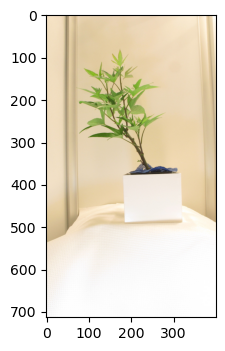

In [2]:
class options:
    def __init__(self):
        self.image = "../img/tutorial_images/roi/original_image.jpg"
        self.debug = "plot"
        self.writeimg= False
        self.outdir = "."
        
# Get options
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug

# Read image

# Inputs:
#   filename - Image file to be read in 
#   mode - Return mode of image; either 'native' (default), 'rgb', 'gray', or 'csv' 
img, path, filename = pcv.readimage(filename=args.image)


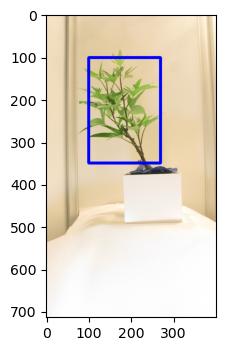

In [3]:
# Define a rectangular ROI 

# Inputs: 
#   img - RGB or grayscale image to plot the ROI on 
#   x - The x-coordinate of the upper left corner of the rectangle 
#   y - The y-coordinate of the upper left corner of the rectangle 
#   h - The height of the rectangle 
#   w - The width of the rectangle 
rect_contour, rect_hierarchy = pcv.roi.rectangle(img=img, x=100, y=100, h=250, w=170)


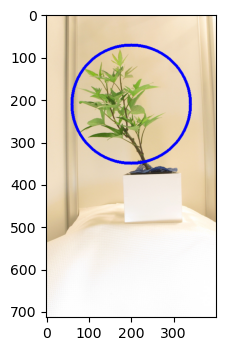

In [4]:
# Define a circular ROI 

# Inputs:
#   img - RGB or grayscale image to plot the ROI on 
#   x - The x-coordinate of the center of the circle 
#   y - The y-coordinate of the center of the circle
#   r - The radius of the circle 
circle_contour, circle_hierarchy = pcv.roi.circle(img=img, x=200, y=210, r=140)


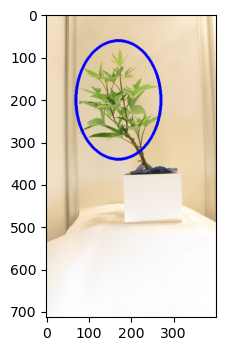

In [5]:
# Define an elliptical ROI 

# Inputs:
#   img - RGB or grayscale image to plot the ROI on 
#   x - The x-coordinate of the center of the ellipse
#   y - The y-coordinate of the center of the ellipse
#   r1 - The radius of the major axis
#   r2 - The radius of the minor axis 
#   angle - The angle of rotation in degrees
ellipse_contour, ellipse_hierarchy = pcv.roi.ellipse(img=img, x=170, y=200, r1=100, r2=140, angle=0)


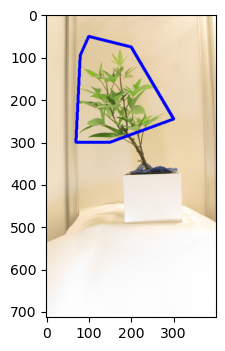

In [6]:
# Make a custom polygon ROI

# Inputs:
#   img      - Input image data
#   vertices - List of vertices that define the custom polygon (order matters) 
roi_contour, roi_hierarchy = pcv.roi.custom(img=img, 
                                            vertices=[[100,50], [200,75], 
                                            [300,245], [150,300], 
                                            [70,300], [80,95]])

The last function currently in the ROI sub-package uses a binary image to create a region of interest. In the [NIR tutorial](../nir_tutorial/nir_tutorial.ipynb) we used the `rectangle_mask` function to mask out background. If the background was consistent across images it might be quicker to save the mask and use the binary image as a region of interest. Below, we can make a binary image using the `rectangle_mask` function, but more complicated binary images can also be applied as regions of interest. 


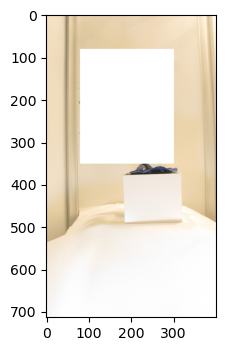

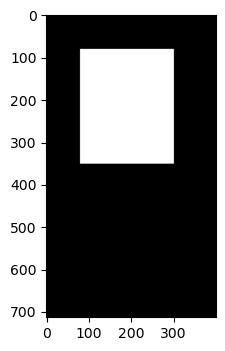

In [7]:
# Inputs:
#   img - RGB or grayscale image data 
#   p1 - Point at the top left corner of the rectangle (tuple)
#   p2 - Point at the bottom right corner of the rectangle (tuple) 
#   color 'black' (default), 'gray', or 'white'
masked1, bin_img, rect_contour1, hierarchy1 = pcv.rectangle_mask(img=img, p1=(80,80), 
                                                                 p2=(300,350), color='white')


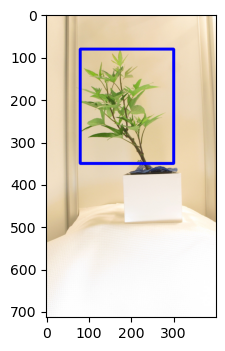

In [8]:
# Apply the binary image as a mask 

# Inputs:
#   img - RGB or grayscale image to plot the ROI on 
#   bin_img - Binary image, the ROI contour will be identified from this image.
bin_contour, bin_hierarchy = pcv.roi.from_binary_image(img=img, bin_img=bin_img)


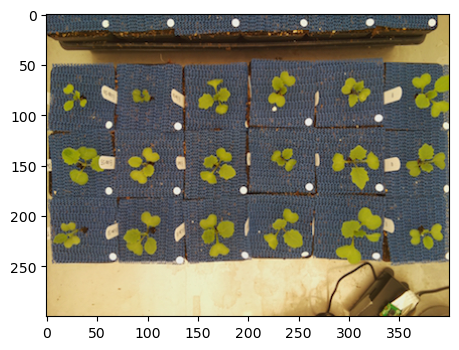

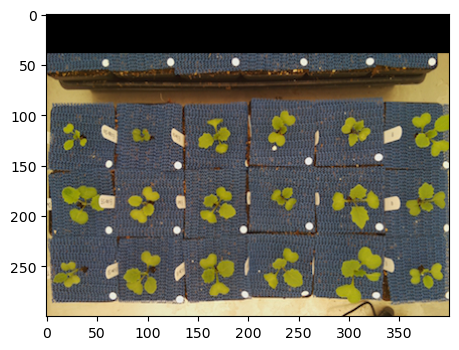

In [9]:
# Read in an image to use with pcv.roi.multi 
multi_img, path, filename = pcv.readimage(filename="../img/tutorial_images/multi_plant/original_image.jpg")

# Inputs:
#   img    = image object
#   number = integer, number of pixels to move image
#   side   = direction to move from "top", "bottom", "right","left"
multi_img = pcv.shift_img(img=multi_img, number=40, side='top')



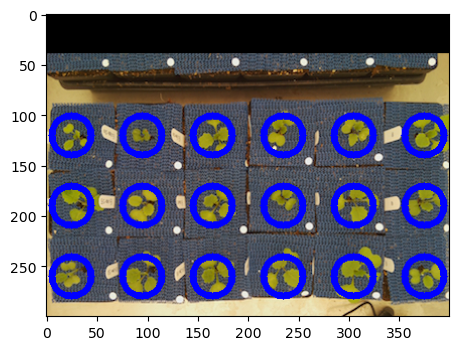

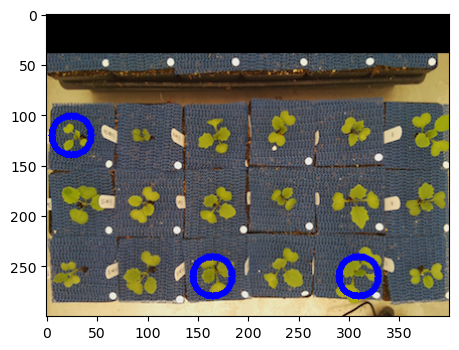

In [10]:
# Create multiple ROIs on the same image:  
# Used to define multiple regions of interest in the same image. Users can either specify a
# starting coordinate (`coord`), number of row and columns, and spacing to create a grid of ROIs,
# or a custom list of coordinates that specify the centers of the ROIs. Providing a custom list 
# of coordinates (list of tuples) is useful for missing plants or any arrangement that isn't 
# a perfect grid. Returns lists of contours and hierarchies that can be used in downstream steps. 

#     Inputs
#     img            = Input image data.
#     coord          = Two-element tuple of the center of the top left object.
#     radius         = Radius of ROIs.
#     spacing        = Two-element tuple of the horizontal and vertical spacing between ROIs.
#     nrows          = Number of rows in ROI layout.
#     ncols          = Number of columns in ROI layout.

# Make a grid of ROIs 
rois1, roi_hierarchy1 = pcv.roi.multi(multi_img, coord=(25,120), radius=20, spacing=(70, 70), nrows=3, ncols=6)

# Specify a list of coordinates of desired ROIs 
rois2, roi_hierarchy2 = pcv.roi.multi(multi_img, coord=[(25,120), (165,260), (310, 260)], radius=20)
